In [1]:
import sys
import pandas as pd
import matplotlib as plt
import sys,math,codecs,time

sys.path.append("../src/")
sys.path.append("../data/income/")
from matplotlib.pyplot import *


In [2]:
texts = codecs.open('../data/language/google_spanish_filtered_1538_until_2000_pagesbooks.csv',"r","unicode_escape")
texto=texts.read()
lines=texto.split("\n")

In [3]:
def rankF(filename):
    texts = codecs.open(filename,"r","unicode_escape")
    
    texto=texts.read()
    lines=texto.split("\n")

    f=[]
    for line in lines:
        es=line.split("\t")
        try:
            f.append((int(es[2])))
        except:
            print(line)
    f.sort()
    f.reverse()
    return(f)

In [4]:
german = rankF('../data/language/google_german_filtered_1564_until_2000_pagesbooks.csv')
english = rankF('../data/language/google_english_filtered_1520_until_2000_pagesbooks.csv')
french = rankF('../data/language/google_french_filtered_1536_until_2000_pagesbooks.csv')
russian = rankF('../data/language/google_russian_filtered_1729_until_2000_pagesbooks.csv')
spanish = rankF('../data/language/google_spanish_filtered_1538_until_2000_pagesbooks.csv')

# Exploratory analysis

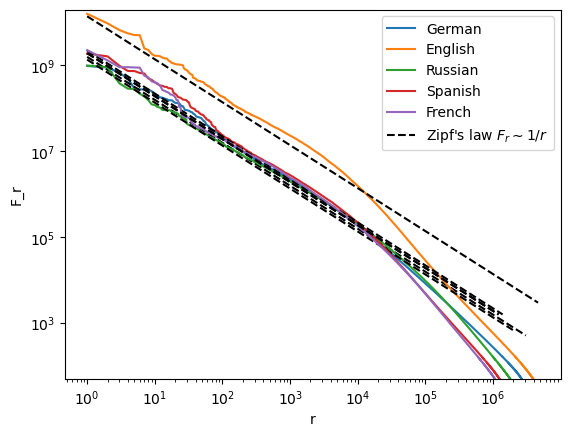

In [6]:
figure()
yscale("log")
xscale("log")
#xlim(1,4*10**6)
ylim(50,2*10**10)

datas=[german,english,russian,french,spanish]
labs=["German","English","Russian","Spanish","French"]
for i in range(5):
    f=datas[i]
    rs=np.arange(len(f))+1
    P = sum(f) #total population
    N = len(f) # number of cities
    C=P/np.sum((1/rs)[:N])

    plot(rs,f,label=labs[i])
    plot(rs,C/rs,"--",color="black")
#plot(rs,f[0]/rs,"--")
plot(rs,C/rs,"--",color="black",label=r"Zipf's law $F_r \sim 1/r$")
xlabel("r")
ylabel("F_r")
legend(loc=1)
show()

In [7]:
for i in range(len(datas)):
    print(labs[i],len(datas[i]),sum(datas[i]))

German 3054376 24532497061
English 4623568 221584648593
Russian 1963418 20538701541
Spanish 1385248 32632629877
French 1206004 28081908551


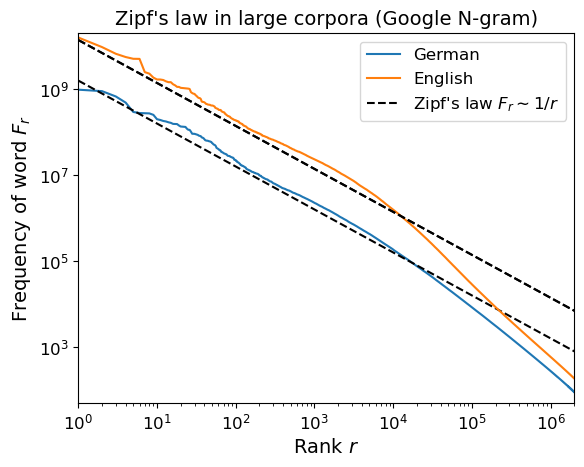

In [6]:
figure()
yscale("log")
xscale("log")
xlim(1,2*10**6)
ylim(50,2*10**10)

datas=[german,english,russian,french,spanish]
labs=["German","English","Russian","Spanish","French"]
for i in range(2):
    f=datas[i]
    rs=np.arange(len(f))+1
    P = sum(f) #total population
    N = len(f) # number of cities
    C=P/np.sum((1/rs)[:N])

    plot(rs,f,label=labs[i])
    plot(rs,C/rs,"--",color="black")
#plot(rs,f[0]/rs,"--")
plot(rs,C/rs,"--",color="black",label=r"Zipf's law $F_r \sim 1/r$")
legend(loc=1)
xlabel(r"Rank $r$", fontsize=14)
ylabel(r"Frequency of word $F_r$",fontsize=14)
legend(loc=1)
legend(fontsize=12,loc=1)
tick_params(axis='both', which='major', labelsize=12)
title("Zipf's law in large corpora (Google N-gram)", fontsize=14)
savefig("figZipfNgram.png",dpi=300,bbox_inches='tight')
show()

## Single books

### Processing of book data (ran once)

In [7]:
name=["alice","wrnpc","beagle","sawyer","pride","jungle"]

In [13]:
datas=[]
for n in name:
    texts = codecs.open('../data/language/'+n+'C.txt',"r","utf-8")
    text=texts.read()
    words=text.split(" ")

    f=[]
    wf=[]
    for w in set(words):
      #  print(w,words.count(w))
        n=words.count(w)
        wf.append((n,w))
        f.append(n)

    wf.sort()
    wf.reverse()
    f.sort()
    f.reverse()
    datas.append(f)

In [ ]:
for i in range(len(datas)):
    ds=np.array(datas[i])
    np.save("../data/language/"+name[i]+".npy",ds)

In [8]:
aliceC=np.load("../data/language/alice.npy")
wrnpcC=np.load("../data/language/wrnpc.npy")
beagleC=np.load("../data/language/beagle.npy")
sawyerC=np.load("../data/language/sawyer.npy")

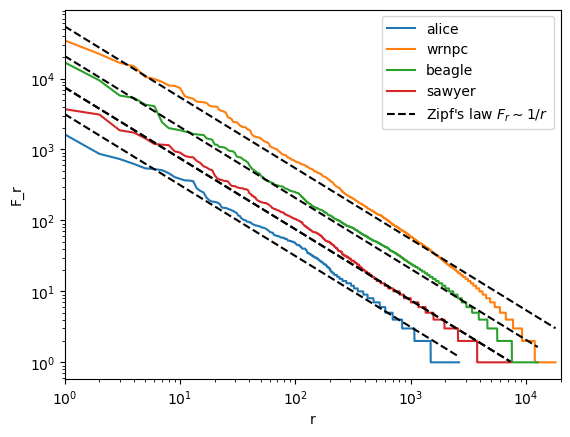

In [5]:
figure()
yscale("log")
xscale("log")
xlim(1,2*10**4)
#ylim(50,2*10**10)

datas=[aliceC,wrnpcC,beagleC,sawyerC]
labs=["alice","wrnpc","beagle","sawyer"]
for i in range(4):
    f=datas[i]
    rs=np.arange(len(f))+1
    P = sum(f) #total population
    N = len(f) # number of cities
    C=P/np.sum((1/rs)[:N])

    plot(rs,f,label=labs[i])
    plot(rs,C/rs,"--",color="black")
#plot(rs,f[0]/rs,"--")
plot(rs,C/rs,"--",color="black",label=r"Zipf's law $F_r \sim 1/r$")
xlabel("r")
ylabel("F_r")
legend(loc=1)
show()

### Figure books

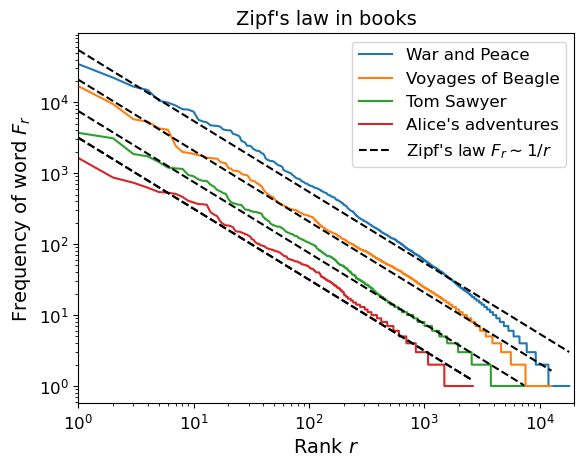

In [6]:
figure()
yscale("log")
xscale("log")
xlim(1,2*10**4)
#ylim(50,2*10**10)

datas=[wrnpcC,beagleC,sawyerC,aliceC]
labs=["War and Peace","Voyages of Beagle","Tom Sawyer","Alice's adventures"]
for i in range(4):
    f=datas[i]
    rs=np.arange(len(f))+1
    P = sum(f) #total population
    N = len(f) # number of cities
    C=P/np.sum((1/rs)[:N])

    plot(rs,f,label=labs[i])
    plot(rs,C/rs,"--",color="black")
#plot(rs,f[0]/rs,"--")
plot(rs,C/rs,"--",color="black",label=r"Zipf's law $F_r \sim 1/r$")
xlabel(r"Rank $r$", fontsize=14)
ylabel(r"Frequency of word $F_r$",fontsize=14)
legend(loc=1)
title("Zipf's law in books",fontsize=14)
legend(fontsize=12,loc=1)
tick_params(axis='both', which='major', labelsize=12)
savefig("fig/figZipfBooks.png",dpi=300,bbox_inches='tight')
show()

In [7]:
datas=[wrnpcC,beagleC,sawyerC,aliceC]
labs=["War and Peace","Voyages of Beagle","Tom Sawyer","Alice's adventures"]

for i in range(len(datas)):
    print(labs[i],len(datas[i]),sum(datas[i]))

War and Peace 18063 565162
Voyages of Beagle 12670 208376
Tom Sawyer 7325 71181
Alice's adventures 2630 26667


# Fitting of rank-frequency

Code and ideas adapted from:

- Paper: M. Gerlach and E. G. Altmann, "Stochastic model for the vocabulary growth in natural languages", Phys. Rev. X 3, 021006 (2013) 
- Paper: H. H. Chen, T. J. Alexander, D. F.M. Oliveira, E. G. Altmann, "Scaling laws and dynamics of hashtags on Twitter", Chaos 30, 063112 (2020)
- Code: https://github.com/edugalt/TwitterHashtags


In [14]:
from modules_distributor import fit
from general import *

In [13]:
# See paper for exact details regarding the models
models = ['simple', 'double_powerlaw', 'lognormal', 'naranan', 'expcutoff', 'weibull', 'shifted', 'double_2gammas']

In [104]:
nrep=10
datas=[wrnpcC,beagleC,sawyerC,aliceC]
labs=["War and Peace","Voyages of Beagle","Tom Sawyer","Alice's adventures"]

for i in range(len(datas)):
    print("Data:"+labs[i]+"\n")
    for model in models:
        res = fit(model = model, counts = datas[i], nrep = nrep)
        print(model + "\n" + str(res))

Data:War and Peace

simple
([1.203230173719983], 6.976490099679027, 10)
double_powerlaw
([2.7475231424278657, 4508.332133982686], 6.697012436566554, 10)
lognormal
([4.0817436526518325, 2.824824894353998], 6.699014424212826, 10)
naranan
([1.302335722556556, -2.5025577734957825], 6.823155563796622, 10)
expcutoff
([0.929449320266719, 0.00016475327630361935], 6.679208776360915, 10)
weibull
([-0.37052162481965667, 2.8097878650718497], 7.771038843920993, 10)


/home/ega/gitRepos/statisticalLaws/figures/../src/modules_fitting_spl.py:55: RuntimeWarning: invalid value encountered in log
  D = sum(x/M*np.log((np.arange(N)+1)+b))


shifted
([1.4102799048467094, 10.995549114603282], 6.770859682399756, 10)
double_2gammas
([0.9666802442329269, 2.47183496849206, 3312.3810229548976], 6.694696098071737, 10)
Data:Voyages of Beagle

simple
([1.2015920824633852], 7.024146651654216, 10)
double_powerlaw
([4.10990095346809, 6651.337605094759], 6.7242948854585896, 10)
lognormal
([4.032154464909118, 3.0018564456237105], 6.773845720019082, 10)
naranan
([1.2798477521825902, -1.9405247181982042], 6.917472909468345, 10)
expcutoff
([0.91959962817943, 0.0001729571727332344], 6.714777574570862, 10)
weibull
([-0.3643969199243073, 2.760965623078862], 7.849109865993501, 10)
shifted
([1.365422982256141, 7.912691145771288], 6.87409015646222, 10)
double_2gammas
([0.9730615291801124, 3.3445055551857354, 5133.056519520909], 6.722545336593402, 10)
Data:Tom Sawyer

simple
([1.2058688413514527], 6.901031435358362, 10)
double_powerlaw
([20.901456223986685, 6947.34288858326], 6.570404764969105, 10)
lognormal
([4.1000099567709665, 2.62892143989851

In [105]:
datas=[german,english,russian,french,spanish]
labs=["German","English","Russian","Spanish","French"]

for i in range(len(datas)):
    print("Data:"+labs[i]+"\n")
    for model in models:
        res = fit(model = model, counts = datas[i], nrep = nrep)
        print(model + "\n" + str(res))

Data:German

simple
([1.1583026160206216], 8.613733718895237, 10)
double_powerlaw
([1.6133760647123745, 19747.324727114206], 8.395930479709262, 10)
lognormal
([5.15552016716432, 3.9969997905593697], 8.383973268317728, 10)
naranan
([1.2158756762110228, 2.407399945655453], 8.487513013791915, 10)
expcutoff
([1.0213451082685152, 1.8635567959341288e-06], 8.41009685158407, 10)
weibull
([-0.3065748742172346, 3.2635805310339174], 9.423119531547869, 10)
shifted
([1.2551384625881745, 8.278221929937754], 8.458514975728825, 10)
double_2gammas
([0.9665629283648722, 1.5637812905060338, 11085.479393960999], 8.393079243625408, 10)
Data:English

simple
([1.1782123990351572], 7.793636490842732, 10)
double_powerlaw
([1.7655044895779994, 7834.809006403057], 7.570419130752356, 10)
lognormal
([4.342024117162181, 3.8012195013008734], 7.594053953815492, 10)
naranan
([1.2333363554998908, -1.7115741731296912], 7.710038503948984, 10)
expcutoff
([1.0408840707566571, 5.093406134778001e-06], 7.619096615705333, 10)


In [20]:
nrep=10
alice=datas[3]
wrnpc=datas[0]

In [19]:
nrep = 1 # number of repetitions

for model in models:
    res = fit(model = model, counts = alice, nrep = nrep)
    print(model + "\n" + str(res))

simple
([1.186077997114321], 7.515419934078821, 1)
double_powerlaw
([1.7733742941638448, 8189.285686507741], 7.336346666800296, 1)
lognormal
([3.9518954410169025, 3.8631135858521493], 7.339233968964155, 1)
naranan
([1.2553028153727612, 2.020654334381157], 7.406270181015581, 1)
expcutoff
([1.0486682208866898, 7.196322071056564e-06], 7.350612572552332, 1)
weibull
([0.08027440461092775, 1.9227693572345195], 8.404932765539222, 1)
shifted
([1.287331046393791, 4.767040853997836], 7.3913544875035235, 1)
double_2gammas
([1.020132170744207, 1.803257669346165, 10317.441301987728], 7.335325719885375, 1)


In [21]:
nrep = 1 # number of repetitions

for model in models:
    res = fit(model = model, counts = wrnpc, nrep = nrep)
    print(model + "\n" + str(res))

simple
([1.1582850231495425], 8.613733724768187, 1)
double_powerlaw
([1.613376108277894, 19747.857025704783], 8.395930479709264, 1)
lognormal
([5.155579290686422, 3.9969404651712086], 8.383973268373335, 1)
naranan
([1.2158756762110228, 2.407399945655453], 8.487513013791915, 1)
expcutoff
([1.021317685051247, 1.8658496883463973e-06], 8.410096865777959, 1)
weibull
([-0.30657965042072477, 3.2635987529153785], 9.423119531758136, 1)
shifted
([1.255137933501811, 8.278177656756187], 8.458514975729138, 1)
double_2gammas
([0.9665629283648722, 1.5637812905060338, 11085.479393960999], 8.393079243625408, 1)


In [23]:
nrep = 1 # number of repetitions

for model in models:
    res = fit(model = model, counts = german, nrep = nrep)
    print(model + "\n" + str(res))

simple
([1.1582850231495425], 8.613733724768187, 1)
double_powerlaw
([1.613376108277894, 19747.857025704783], 8.395930479709264, 1)
lognormal
([5.155579290686422, 3.9969404651712086], 8.383973268373335, 1)
naranan
([1.2158756762110228, 2.407399945655453], 8.487513013791915, 1)
expcutoff
([1.021317685051247, 1.8658496883463973e-06], 8.410096865777959, 1)
weibull
([-0.30657965042072477, 3.2635987529153785], 9.423119531758136, 1)
shifted
([1.255137933501811, 8.278177656756187], 8.458514975729138, 1)


In [24]:
nrep = 1 # number of repetitions

for model in models:
    res = fit(model = model, counts = english, nrep = nrep)
    print(model + "\n" + str(res))

simple
([1.1782314319052674], 7.793636498724034, 1)
double_powerlaw
([1.7655044895779994, 7834.809006403057], 7.570419130752356, 1)
lognormal
([4.342024117162181, 3.8012195013008734], 7.594053953815492, 1)
naranan
([1.2333347068776177, 1.7116162180446375], 7.710038504013407, 1)
expcutoff
([1.0409327896219414, 5.091154774565601e-06], 7.619096620551798, 1)
weibull
([-0.33100641431283157, 2.9346157618213238], 8.646697691999822, 1)
shifted
([1.2687480090593701, 4.7133401191353705], 7.688610224083355, 1)


In [25]:
nrep = 1 # number of repetitions

for model in models:
    res = fit(model = model, counts = spanish, nrep = nrep)
    print(model + "\n" + str(res))

simple
([1.1902579430668077], 7.375560340896654, 1)
double_powerlaw
([1.7740488551833467, 8730.429068601883], 7.223607444380756, 1)
lognormal
([3.353662331666751, 4.271890114327947], 7.240560269636681, 1)
naranan
([1.2450816798204156, 1.4769286773379624], 7.3066523458598605, 1)
expcutoff
([1.05992493165396, 6.896453857510941e-06], 7.224375406526374, 1)
weibull
([0.08042522379480042, 1.925139009255132], 8.277444151112896, 1)
shifted
([1.2620719956012088, 2.6223645844032846], 7.30011881566573, 1)


## Model comparison in Spanish

In [79]:
from modules_fitting_2exp import *
from modules_fitting_weibull import *

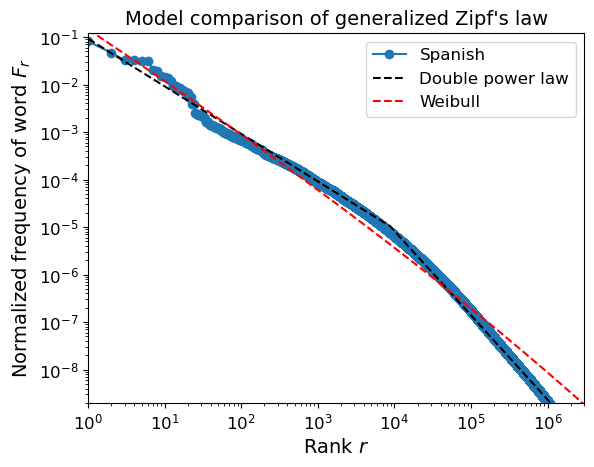

In [101]:
figure()
yscale("log")
xscale("log")
xlim(1,3*10**6)
ylim(2*10**(-9),0.12)

#datas=[german,english,russian,french,spanish]
#labs=["German","English","Russian","Spanish","French"]
datas=[spanish,english]
labs=["Spanish","English"]
for i in range(1):
    f=datas[i]
    rs=np.arange(len(f))+1
    P = sum(f) #total population
    N = len(f) # number of cities
    C=P/np.sum((1/rs)[:N])

    plot(rs,f/np.sum(f),"o-",label=labs[i])
 #   plot(rs,C/rs,"--",color="black")
#plot(rs,f[0]/rs,"--")
#plot(rs,C/rs,"--",color="black",label=r"Zipf's law $F_r \sim 1/r$")

# Double power law
#xdp =np.arange(10**7)+1
#ydp =pdf_2exp_disc(xdp,kmin=1,kmax=10**7,gamma1=1.0,gamma2=1.765,km=7834)
#plot(xdp,np.sum(english)*ydp,"--",color="black")

xdp =np.arange(10**7)+1
ydp =pdf_2exp_disc(xdp,kmin=1,kmax=len(spanish),gamma1=1.0,gamma2=1.774,km=8730.4)
plot(xdp,ydp,"--",color="black",label="Double power law")

yw = pdf_weibull_disc(xdp,1,len(spanish),0.080425,1.925139)
plot(xdp,yw,"--",color="red",label="Weibull")

legend(loc=1)
xlabel(r"Rank $r$", fontsize=14)
ylabel(r"Normalized frequency of word $F_r$",fontsize=14)
legend(loc=1)
legend(fontsize=12,loc=1)
tick_params(axis='both', which='major', labelsize=12)
title("Model comparison of generalized Zipf's law", fontsize=14)
savefig("fig/zipf-comparison.png",dpi=300,bbox_inches='tight')
show()

## Fitting with $r_{max}$

In [16]:
nrep = 1 # number of repetitions

for model in models:
    try:
        res = fit(model = model, counts = aliceC, nrep = nrep, rmax_Fit=len(aliceC))
        print(model + "\n" + str(res))
    except:
        print("Error: ",model)

Error:  simple
double_powerlaw
([1.3247676541431055, 561.7718688024661], 6.069654591102822, 1)
Error:  lognormal
naranan
([1.0673590908633526, 1.347155452039197], 6.040097794355785, 1)
expcutoff
([0.8312662421614418, 0.0007284548985196061], 6.037119162760527, 1)
weibull
([-0.31471592790054603, 3.297963898179871], 6.029580254837285, 1)
shifted
([1.1465530588462811, 4.118638105673615], 6.032614294881013, 1)


/home/ega/gitRepos/statisticalLaws/notebooks/../src/modules_fitting_2exp.py:127: RuntimeWarning: invalid value encountered in log
  L = np.log(C) + gamma1*summe1 + gamma2*summe2 - summe3*(gamma2-gamma1)*np.log(km)
/home/ega/gitRepos/statisticalLaws/notebooks/../src/modules_fitting_2exp.py:127: RuntimeWarning: divide by zero encountered in log
  L = np.log(C) + gamma1*summe1 + gamma2*summe2 - summe3*(gamma2-gamma1)*np.log(km)
/home/ega/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:917: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


No convergence in maximizing likelihood!
double_2gammas
([-1, -1, -1], inf, 0)


In [ ]:
datas=[german,english,russian,french,spanish]
labs=["German","English","Russian","Spanish","French"]

for i in range(len(datas)):
    print("Data:"+labs[i]+"\n")
    for model in models:
        try:
            res = fit(model = model, counts = datas[i], nrep = nrep,rmax_Fit=len(datas[i]))
            print(model + "\n" + str(res))
        except:
            print(model,"fail")

Data:German

simple fail
double_powerlaw
([1.4279968631502498, 10482.383109844133], 8.386363468197077, 1)
lognormal fail
naranan
([1.1368128345744202, 1.7258332378076726], 8.403902363360961, 1)
expcutoff fail
weibull fail
shifted fail
double_2gammas fail
Data:English

simple fail
double_powerlaw
([1.7267061087068214, 7327.6852488658005], 7.5693924350300055, 1)
lognormal fail
naranan
([1.1760993303765515, 1.30003459572491], 7.660338043324548, 1)
expcutoff fail
weibull fail
shifted fail


Wiki - book

In [29]:
texts = codecs.open('../data/language/wikipedia-linguisticLaws.csv',"r","unicode_escape")
texto=texts.read()
lines=texto.split("\n")
wiki=[]
for l in lines[:-1]:
    wiki.append(int(l.split("\t")[1]))
wiki.sort()
wiki.reverse()
wiki=np.array(wiki)

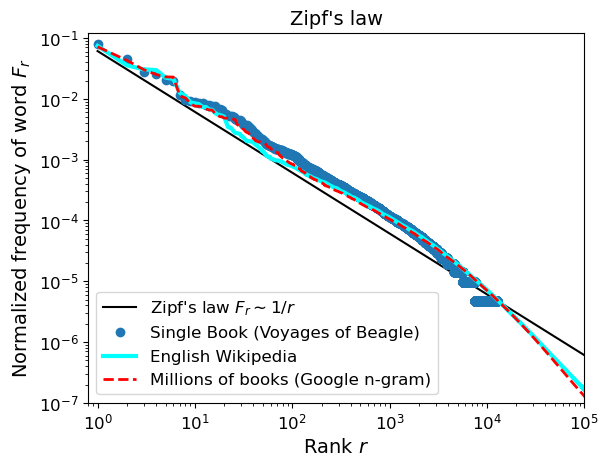

In [82]:
figure()
yscale("log")
xscale("log")
xlim(0.8,10**5)
ylim(1*10**(-7),0.12)

book=wrnpcC
datas=[wrnpcC,beagleC,sawyerC,aliceC]
datas=[beagleC]

plot([1,10**5],[book[0]/np.sum(book),10**(-5)*book[0]/np.sum(book)],"-",color="black",label=r"Zipf's law $F_r \sim 1/r$")


for d in datas:
    book=d
    plot(np.arange(len(book))+1,book/np.sum(book),"o",label="Single Book (Voyages of Beagle)")
plot(np.arange(len(wiki))+1,wiki/np.sum(wiki),"-",lw=3,color="cyan",label="English Wikipedia")
plot(np.arange(len(english))+1,english/np.sum(english),"--",lw=2,color="Red",label="Millions of books (Google n-gram)")


xlabel(r"Rank $r$", fontsize=14)
ylabel(r"Normalized frequency of word $F_r$",fontsize=14)
legend(fontsize=12)
tick_params(axis='both', which='major', labelsize=12)
title("Zipf's law", fontsize=14)
savefig("fig/zipf-smallbig.png",dpi=300,bbox_inches='tight')
show()